Minimo cuadrados - Regresión lineal

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [10]:
def min_cuad(x, y):
    sumXY = 0
    sumXX = 0
    sumX = 0
    sumY = 0
    n = len(x)
    for i in range(len(x)):
        sumXY += x[i] * y[i]
        sumXX += x[i] ** 2
        sumX += x[i]
        sumY += y[i]

    A = np.array([[n, sumX], [sumX, sumXX]])   
    B = np.array([sumY, sumXY])
    Ainv = np.linalg.inv(A)
    S = np.dot(Ainv,B)
    print('A-1: ', Ainv)
    print()
    print('S: ', S)
    a1 = (n * sumXY - sumX * sumY) / (n * sumXX - sumX ** 2)
    a0 = (sumY - a1 * sumX) / n
    return a0, a1  

In [11]:
x_dato = np.arange(0, 20)
y_dato = np.array([i**4 for i in x_dato])

print(min_cuad(x_dato, y_dato))

A-1:  [[ 0.18571429 -0.01428571]
 [-0.01428571  0.00150376]]

S:  [-25980.6   5696.2]
(-25980.6, 5696.2)


In [4]:
x_dato = np.arange(0, 20)
y_dato = np.array([i**4 for i in x_dato])
a0, a1 = min_cuad(x_dato, y_dato)
print(a0, a1)

y_est = a0 + a1 * x_dato

media_y = np.mean(y_dato)

num = np.sum((y_est-media_y) ** 2)
den = np.sum((y_dato-media_y) ** 2)
r = np.sqrt(num/den)
print('r =', r)

[-25980.6   5696.2]
-25980.6 5696.2
r = 0.8609281306877429


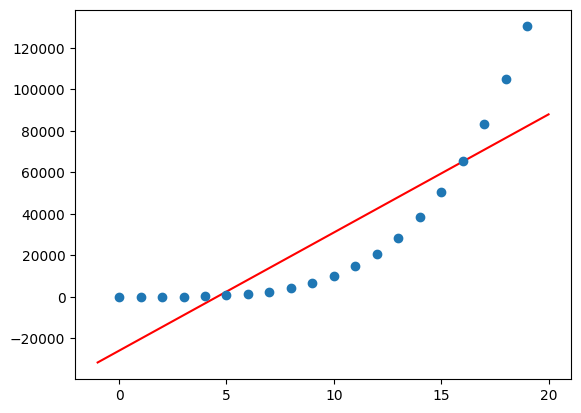

In [12]:
resol = 20
xx = np.linspace(-1, 20, resol)
yy = a0 + a1 * xx

fig,ax = plt.subplots()
ax.plot(xx, yy, 'r')
ax.plot(x_dato, y_dato, 'o')
plt.show()

Minimos cuadrados - Parabola

In [22]:
def Gauss(sumXX,sumXY,sumXXY,sumXXX,sumXXXX,sumX,sumY,n):
    A = np.array([[n, sumX, sumXX], [sumX, sumXX,sumXXX],[sumXX,sumXXX,sumXXXX]])
    B = np.array([sumY, sumXY, sumXXY])
    Ainv = np.linalg.inv(A)
    S = np.dot(Ainv,B)
    
    return S


In [ ]:
def min_cuad_parabola(x, y):
    sumXY = 0
    sumXX = 0
    sumXXY = 0
    sumXXX = 0
    sumXXXX = 0
    sumX = 0
    sumY = 0
    n = len(x)
    for i in range(len(x)):
        sumXY += x[i] * y[i]
        sumXX += x[i] ** 2
        sumXXX += x[i]**3
        sumXXXX += x[i]**4
        sumXXY += (x[i]**2) * y[i]
        sumX += x[i]
        sumY += y[i]

    a0,a1,a2 = Gauss(sumXX,sumXY,sumXXY,sumXXX,sumXXXX,sumX,sumY,n)
    #print('A-1: ', Ainv)
    #print()
    #print('S: ', S)
    return a0,a1,a2
    

In [36]:
x_dato = np.arange(0, 20)
y_dato = np.array([i**2 for i in x_dato])
a0,a1,a2 = min_cuad_parabola(x_dato,y_dato)
print(a0,a1,a2)

y_est = a0 + a1*x_dato + a2 * x_dato**2

media_y = np.mean(y_dato)

num = np.sum((y_est-media_y) ** 2)
den = np.sum((y_dato-media_y) ** 2)
r = np.sqrt(num/den)
print('r =', r)

-2.6962720250933714e-13 1.0557960755663842e-13 0.9999999999999992
r = 1.0000000000000044


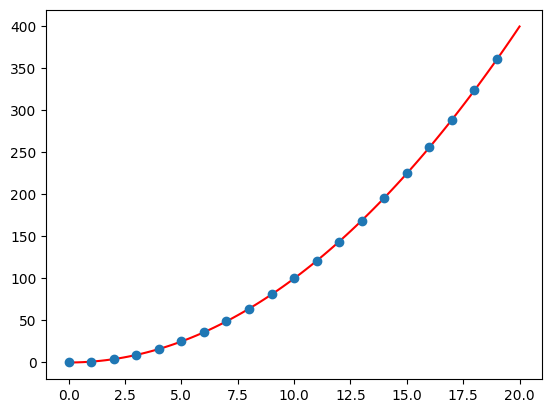

In [37]:
resol = 100
xx = np.linspace(0, 20, resol)
yy = a0 + a1*xx + a2 * xx**2

fig,ax = plt.subplots()
ax.plot(xx, yy, 'r')
ax.plot(x_dato, y_dato, 'o')
plt.show()

MINIMOS CUADRADO - PARABOLA CON RUIDO

In [53]:
N = 21
x_dato = np.array([i for i in range(0,21)])
y_dato = np.zeros(N)

for _ in range(0,N):
    d = np.random.rand()
    y_dato[_] = (_+12.5*d)**2

a0,a1,a2 = min_cuad_parabola(x_dato,y_dato)
print(a0,a1,a2)

y_est = a0 + a1*x_dato + a2 * x_dato**2

media_y = np.mean(y_dato)

num = np.sum((y_est-media_y) ** 2)
den = np.sum((y_dato-media_y) ** 2)
r = np.sqrt(num/den)
print('r =', r)


53.17113815745617 15.467363084351316 1.0771363214957352
r = 0.8887051355157468


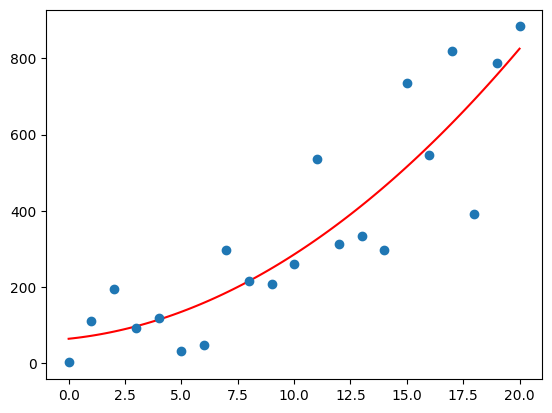

In [52]:
resol = 100
xx = np.linspace(0, 20, resol)
yy = a0 + a1*xx + a2 * xx**2

fig,ax = plt.subplots()
ax.plot(xx, yy, 'r')
ax.plot(x_dato, y_dato, 'o')
plt.show()

SI TENGO UN POLINOMIO DE ORDEN CINCO COMO QUEDARIA LA MATRIZ

REGRESIÓN LINEAL - LINEALIZAR, CURVA DE CIERTO ESTILO Y VOLVERLO A UNA LINEA RECTA